In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/preview"

/content/drive/MyDrive/preview


In [4]:
import pandas as pd
import matplotlib as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/preview/Cleaned_Lands.csv')

In [6]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/preview/Cleaned_Lands.csv')

# Assuming 'target_variable' is the column name for your labels
# Separate features (X) and labels (y)
X = df.drop('Land_price', axis=1)  # Replace 'target_variable' with the actual column name
y = df['Land_price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(
    X, y, test_size=0.3, random_state=42  # Adjust test_size and random_state as needed
)

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(1400, 7)
(1400,)
(600, 7)
(600,)


In [8]:
import numpy as np

In [9]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[-2147483648     2500000     2500001 ...   430000018   430000019
   430000020]
[-2147483648     2500005     2500013     2500014     2500016     2500018
     2500019     2500020     2800001     2800002     2800004     2800005
     2800008     2800009     2800010     2800011     2800019     2900000
     2900001     2900003     2900007     2900010     2900011     2900012
     3000003     3000004     3000006     3000009     3000011     3000012
     3000013     3000015     3000016     3000017     3500005     3500011
     3500012     3500013     3500014     3500017     3500018     4000009
     4000012     4000018     4000020     4100006     4100007     4100009
     4100014     4100015     4100016     4100017     4100019     4500000
     4500001     4500002     4500006     4500011     4500013     4500015
     4500016     4500018     4500019     4500020     4600002     4600003
     4600008     4600009     4600011     4600012     4600020     5550004
     5550009     5550011     5550012     5550

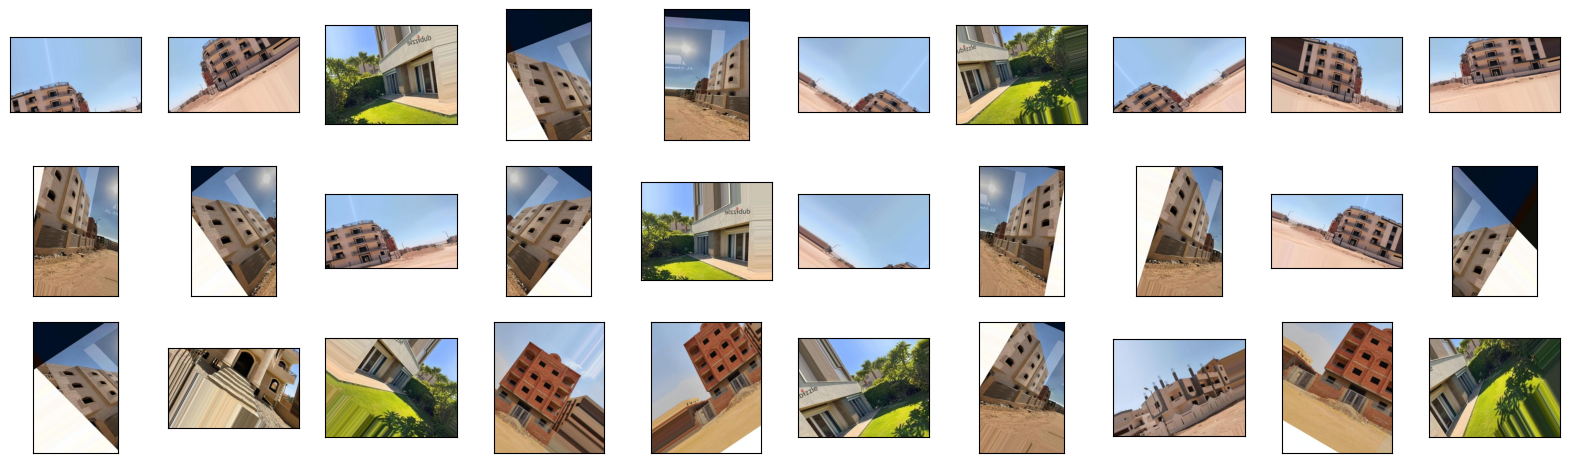

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import os

preview_folder = "/content/drive/MyDrive/preview"  # Path to your preview folder

image_files = [f for f in os.listdir(preview_folder) if os.path.isfile(os.path.join(preview_folder, f))]
image_files = [f for f in image_files if f.endswith(('.jpg', '.png', '.jpeg'))]  # Add more extensions if needed

plt.figure(figsize=[20, 20])

for i in range(min(30, len(image_files))):  # Display up to 30 images
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image_path = os.path.join(preview_folder, image_files[i])

    try:
        img = Image.open(image_path)
        plt.imshow(img, cmap=plt.cm.binary)  # Or adjust the colormap as needed
    except Exception as e:
        print(f"Error displaying image {image_path}: {e}")

plt.show()

In [11]:
import keras
from keras.models import Sequential
from keras import datasets, layers, models
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [12]:
!pip install scikit-learn

In [13]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder on the training labels and transform
train_labels_encoded = encoder.fit_transform(train_labels.values.reshape(-1, 1))

# Transform the test labels using the fitted encoder
test_labels_encoded = encoder.transform(test_labels.values.reshape(-1, 1))


In [14]:
train_images.shape

(1400, 7)

In [15]:
import keras
from keras.models import Sequential
from keras import datasets, layers, models
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_images has shape (num_samples, num_features)

# Get the number of unique classes from your labels (e.g., train_labels)
num_classes = len(np.unique(train_labels)) # Getting the number of unique classes in your target variable 'Lands'

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1))) #num of weights = ((3*3*3)+1)*32
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) # Now num_classes is defined

# Checking the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         200,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1074)                │          35,442 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,498 (923.82 KB)

 Trainable params: 236,498 (923.82 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import keras
from keras.models import Sequential
from keras import datasets, layers, models
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_images has shape (num_samples, num_features)
num_features = train_images.shape[1]

model = Sequential()

# Input layer for tabular data
model.add(Dense(64, activation='relu', input_shape=(num_features,)))

# Subsequent layers
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # num_classes should be defined earlier

# Checking the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1074)                │          35,442 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,034 (148.57 KB)

 Trainable params: 38,034 (148.57 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np

# Load the CSV file into a Pandas DataFrame (replace with your file path)
df = pd.read_csv('/content/drive/MyDrive/preview/Cleaned_Lands.csv')

# 1. Encode 'Lands' column using LabelEncoder
label_encoder = LabelEncoder()
df['Lands_encoded'] = label_encoder.fit_transform(df['Special_location'])

# 2. Separate features (X) and labels (y) - KEEP 'Land_type'
X = df.drop(['Land_price'], axis=1)  # Exclude 'Land_price', 'Lands', but keep 'Land_type'
y = df['Lands_encoded']

# 3. Split the data
train_images, test_images, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. One-hot encode categorical features
categorical_features = ['Land_location', 'Soil_type',]  # Add other categorical columns as needed

# Create a copy of the DataFrames to avoid modifying the originals
train_images_encoded = train_images.copy()
test_images_encoded = test_images.copy()

# Before training the model, convert 'Soil_type' to numeric using LabelEncoder if it contains strings:
if train_images_encoded['Land_location'].dtype == object:  # Check if 'Land_type' is of object (string) type
    label_encoder = LabelEncoder()
    train_images_encoded['Land_location'] = label_encoder.fit_transform(train_images_encoded['Land_location'])
    test_images_encoded['Land_location'] = label_encoder.transform(test_images_encoded['Land_location'])




if train_images_encoded['Soil_type'].dtype == object:  # Check if 'Land_type' is of object (string) type
    label_encoder = LabelEncoder()
    train_images_encoded['Soil_type'] = label_encoder.fit_transform(train_images_encoded['Soil_type'])
    test_images_encoded['Soil_type'] = label_encoder.transform(test_images_encoded['Soil_type'])




# Replace 'Yes' and 'No' with 1 and 0 in all columns of train_images_encoded and test_images_encoded
for column in train_images_encoded.columns:
    train_images_encoded[column] = train_images_encoded[column].replace({'Yes': 1, 'No': 0})
for column in test_images_encoded.columns:
    test_images_encoded[column] = test_images_encoded[column].replace({'Yes': 1, 'No': 0})

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder on the training data and transform
encoded_features_train = encoder.fit_transform(train_images_encoded[categorical_features])
encoded_features_test = encoder.transform(test_images_encoded[categorical_features])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames for encoded features
encoded_features_train_df = pd.DataFrame(encoded_features_train, columns=encoded_feature_names, index=train_images_encoded.index)
encoded_features_test_df = pd.DataFrame(encoded_features_test, columns=encoded_feature_names, index=test_images_encoded.index)

# Replace original categorical features with encoded features
train_images_encoded = train_images_encoded.drop(categorical_features, axis=1)
train_images_encoded = pd.concat([train_images_encoded, encoded_features_train_df], axis=1)
test_images_encoded = test_images_encoded.drop(categorical_features, axis=1)
test_images_encoded = pd.concat([test_images_encoded, encoded_features_test_df], axis=1)

# Ensure all columns are numeric
train_images_encoded = train_images_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)
test_images_encoded = test_images_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

# 5. One-hot encode the target labels
# Get the actual number of unique classes
num_classes = train_labels.max() + 1  # Update num_classes based on encoded labels

# One-hot encode the target labels using the correct num_classes
from tensorflow.keras.utils import to_categorical
train_labels_encoded = to_categorical(train_labels, num_classes=num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes=num_classes)

# 6. Define and compile your model
num_features = train_images_encoded.shape[1]  # Use train_images_encoded

from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(num_features,)))
model.add(layers.Dropout(0.3))  # Higher dropout rate to prevent overfitting
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(num_classes, activation='softmax')) # Output layer with correct number of units

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy
              metrics=['accuracy'])

# 7. Train the model
history = model.fit(train_images_encoded, train_labels_encoded,  # Use train_images_encoded
                    batch_size=128,
                    epochs=100,
                    validation_data=(test_images_encoded, test_labels_encoded))  # Use test_images_encoded

Epoch 1/100


<ipython-input-21-31ab96212a46>:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_images_encoded[column] = train_images_encoded[column].replace({'Yes': 1, 'No': 0})
<ipython-input-21-31ab96212a46>:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_images_encoded[column] = test_images_encoded[column].replace({'Yes': 1, 'No': 0})
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4441 - loss: 141.4773 - val_accuracy: 0.4875 - val_loss: 2.2243
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4832 - loss: 55.5024 - val_accuracy: 0.5250 - val_loss: 28.1436
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5009 - loss: 43.5794 - val_accuracy: 0.5250 - val_loss: 36.0147
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4877 - loss: 49.2215 - val_accuracy: 0.4750 - val_loss: 27.5330
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5112 - loss: 33.4701 - val_accuracy: 0.4750 - val_loss: 31.0639
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4910 - loss: 35.5153 - val_accuracy: 0.4750 - val_loss: 19.6022
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4707 - loss: 36.4131 - val_accuracy: 0.4750 - val_loss: 21.6890
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4739 - loss: 30.1566 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

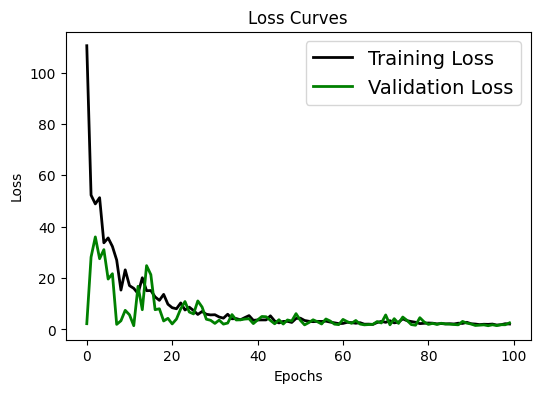

In [22]:
 # Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

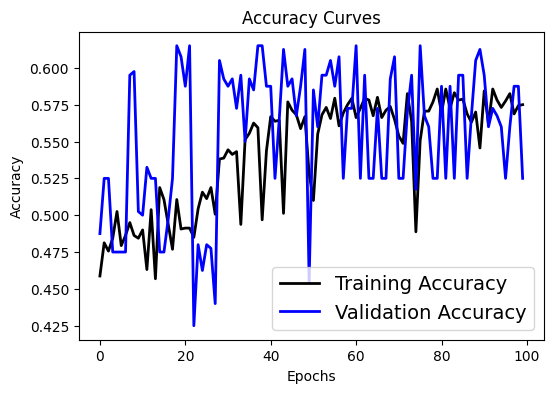

In [23]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [24]:
model = Sequential()

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(28,28,1))) #((3*3*3)+1)*128
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu')) #((3*3*128)+1)+256
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 850,178 (3.24 MB)

 Trainable params: 850,178 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np

# Get the number of unique classes and features
num_classes = len(np.unique(train_labels))
num_classes = train_labels.max() + 1       # Changed line: Calculate num_classes based on maximum label value
num_features = train_images.shape[1]
# Define a feedforward neural network model
model = Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(num_features,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))


train_images = train_images.apply(pd.to_numeric, errors='coerce')
test_images = test_images.apply(pd.to_numeric, errors='coerce')



train_images = train_images.fillna(0)
test_images = test_images.fillna(0)

train_labels_encoded = to_categorical(train_labels, num_classes=num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes=num_classes)




# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_encoded,
                    batch_size=128,
                    epochs=100,
                    validation_data=(test_images, test_labels_encoded))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4955 - loss: 159.1245 - val_accuracy: 0.4750 - val_loss: 134.8312
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4847 - loss: 180.8539 - val_accuracy: 0.4750 - val_loss: 158.7144
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4647 - loss: 132.3398 - val_accuracy: 0.4750 - val_loss: 75.1171
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4892 - loss: 146.7450 - val_accuracy: 0.4750 - val_loss: 62.0351
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4778 - loss: 91.2480 - val_accuracy: 0.4750 - val_loss: 105.6543
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4696 - loss: 90.2104 - val_accuracy: 0.4750 - val_loss: 13.3933
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4718 - loss: 77.9196 - val_accuracy: 0.4750 - val_loss: 62.7351
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4784 - loss: 62.1062 - val_accuracy

Text(0.5, 1.0, 'Loss Curves')

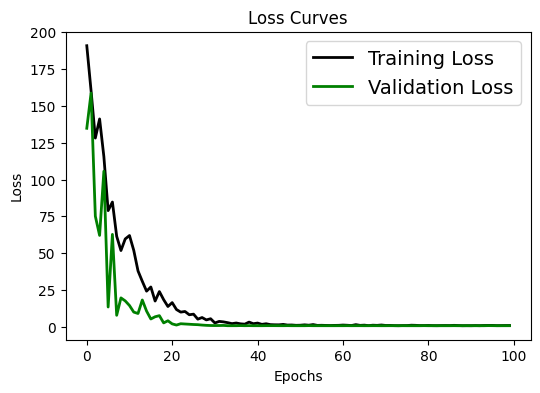

In [26]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

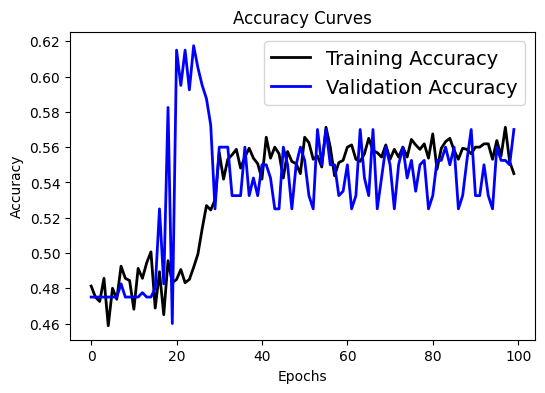

In [27]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32, 3))
base_model.trainable = False ## Not trainable weights

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
model2 = Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model2.add(layers.Dense(56,activation='relu'))
model.add(layers.Dropout(0.2))
model2.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model2.add(layers.Dense(32,activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 56)                  │           7,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           3,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,793,370 (56.43 MB)

 Trainable params: 78,682 (307.35 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [32]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/preview/Cleaned_Lands.csv')

# Encode 'Lands' column using LabelEncoder
label_encoder = LabelEncoder()
df['Lands_encoded'] = label_encoder.fit_transform(df['Special_location'])

# Separate features (X) and labels (y) - KEEP 'Land_type'
X = df.drop(['Land_price'], axis=1)  # Exclude 'Land_price', 'Lands', but keep 'Land_type'
y = df['Lands_encoded']

# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot encode categorical features
categorical_features = ['Land_location', 'Soil_type']

# Create a copy of the DataFrames
train_images_encoded = train_images.copy()
test_images_encoded = test_images.copy()

# Before training the model, convert 'Soil_type' to numeric if it contains strings:
if train_images_encoded['Soil_type'].dtype == object:
    label_encoder = LabelEncoder()
    train_images_encoded['Soil_type'] = label_encoder.fit_transform(train_images_encoded['Soil_type'])
    test_images_encoded['Soil_type'] = label_encoder.transform(test_images_encoded['Soil_type'])




if train_images_encoded['Land_location'].dtype == object:
    label_encoder = LabelEncoder()
    train_images_encoded['Land_location'] = label_encoder.fit_transform(train_images_encoded['Land_location'])
    test_images_encoded['Land_location'] = label_encoder.transform(test_images_encoded['Land_location'])





# Replace 'Yes' and 'No' with 1 and 0 in all columns
for column in train_images_encoded.columns:
    train_images_encoded[column] = train_images_encoded[column].replace({'Yes': 1, 'No': 0})
for column in test_images_encoded.columns:
    test_images_encoded[column] = test_images_encoded[column].replace({'Yes': 1, 'No': 0})

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data and transform
encoded_features_train = encoder.fit_transform(train_images_encoded[categorical_features])
encoded_features_test = encoder.transform(test_images_encoded[categorical_features])

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrames for encoded features
encoded_features_train_df = pd.DataFrame(encoded_features_train, columns=encoded_feature_names, index=train_images_encoded.index)
encoded_features_test_df = pd.DataFrame(encoded_features_test, columns=encoded_feature_names, index=test_images_encoded.index)

# Replace original categorical features with encoded features
train_images_encoded = train_images_encoded.drop(categorical_features, axis=1)
train_images_encoded = pd.concat([train_images_encoded, encoded_features_train_df], axis=1)
test_images_encoded = test_images_encoded.drop(categorical_features, axis=1)
test_images_encoded = pd.concat([test_images_encoded, encoded_features_test_df], axis=1)

# Ensure all columns are numeric
train_images_encoded = train_images_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)
test_images_encoded = test_images_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

# One-hot encode the target labels
num_classes = train_labels.max() + 1
train_labels_encoded = to_categorical(train_labels, num_classes=num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes=num_classes)



# Reshape train_images and test_images to (32, 32, 3) for VGG16
# Replace this with your actual image loading and preprocessing logic
train_images_reshaped = np.zeros((train_images_encoded.shape[0], 32, 32, 3))
test_images_reshaped = np.zeros((test_images_encoded.shape[0], 32, 32, 3))

# Load the VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Fine-tune the last few layers
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Create your model
model2 = Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(56, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model using the reshaped images
history = model2.fit(train_images_reshaped, train_labels_encoded,
                    batch_size=128,
                    epochs=50
                     ,
                    validation_data=(test_images_reshaped, test_labels_encoded))


<ipython-input-32-a5090246027f>:56: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_images_encoded[column] = train_images_encoded[column].replace({'Yes': 1, 'No': 0})
<ipython-input-32-a5090246027f>:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_images_encoded[column] = test_images_encoded[column].replace({'Yes': 1, 'No': 0})


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 177s 13s/step - accuracy: 0.5232 - loss: 0.7276 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 223s 15s/step - accuracy: 0.5209 - loss: 0.6929 - val_accuracy: 0.4750 - val_loss: 0.6943
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 194s 15s/step - accuracy: 0.5029 - loss: 0.6989 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 185s 14s/step - accuracy: 0.5177 - loss: 0.6931 - val_accuracy: 0.5250 - val_loss: 0.6919
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 201s 14s/step - accuracy: 0.5263 - loss: 0.6950 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 201s 14s/step - accuracy: 0.5331 - loss: 0.6904 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 200s 14s/step - accuracy: 0.5053 - loss: 0.6967 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 182s 14s/step - accuracy: 0.5109 - loss: 0.6966 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss Curves')

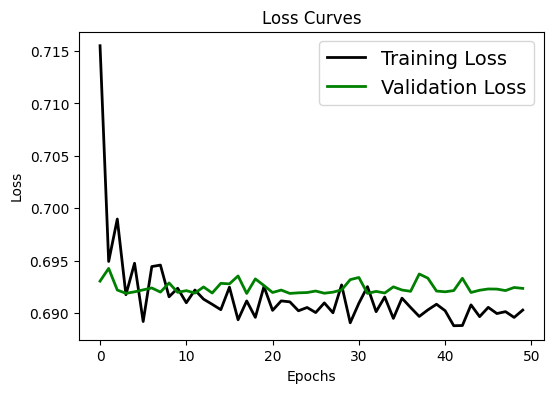

In [33]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

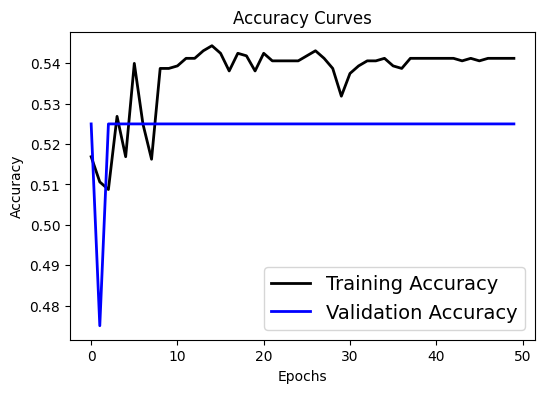

In [34]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)